# Advanced Calculus with SageMath - Chapter 4

## Vector Fields and Line Integrals

This notebook contains Chapter 4 from the main Advanced Calculus with SageMath notebook.

For the complete course, please refer to the main notebook: `Advanced Calculus with SageMath.ipynb`


In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 4: Vector Fields and Line Integrals

### Understanding Vector Fields

A vector field assigns a vector to each point in space. Examples:
- **Gravitational field**: $\vec{F} = -GMm/r^2 \hat{r}$
- **Electric field**: $\vec{E} = kq/r^2 \hat{r}$
- **Fluid velocity**: $\vec{v}(x,y,z)$

### Line Integrals and Work

The line integral $\int_C \vec{F} \cdot d\vec{r}$ represents work done by force field $\vec{F}$ along curve C:

$$\int_C \vec{F} \cdot d\vec{r} = \int_a^b \vec{F}(\vec{r}(t)) \cdot \frac{d\vec{r}}{dt} dt$$

In [11]:
from sage.misc.latex import LatexExpr
var('t')  # ensure t is defined

print("VECTOR FIELDS AND LINE INTEGRALS")
print("=" * 50)

# Define a vector field F = (y, -x)
F_x, F_y = y, -x
F_field = vector([F_x, F_y])
show(LatexExpr(r"\vec{F}(x,y) = " + latex(F_field)))

# Parametric curve: r(t) = (2cos t, 2sin t), 0 ≤ t ≤ 2π
r_x, r_y = 2*cos(t), 2*sin(t)
r_curve = vector([r_x, r_y])

print("\nPARAMETRIC CURVE")
show(LatexExpr(r"\vec{r}(t) = " + latex(r_curve) + r",\quad t\in[0,2\pi]"))

# Compute dr/dt
dr_dt = vector([diff(r_x, t), diff(r_y, t)])
show(LatexExpr(r"\frac{d\vec{r}}{dt} = " + latex(dr_dt)))

# Substitute parametric equations into vector field
F_on_curve = vector([F_x.subs({x: r_x, y: r_y}), F_y.subs({x: r_x, y: r_y})])

print("\nVECTOR FIELD ON CURVE")
show(LatexExpr(r"\vec{F}(\vec{r}(t)) = " + latex(F_on_curve)))

# Compute F · dr/dt
dot_product = F_on_curve.dot_product(dr_dt)
dot_product_simplified = simplify(dot_product)

print("\nDOT PRODUCT")
show(LatexExpr(r"\vec{F}\cdot \frac{d\vec{r}}{dt} = " + latex(dot_product_simplified)))

# Compute line integral
line_integral = integrate(dot_product_simplified, (t, 0, 2*pi))

print("\nLINE INTEGRAL")
show(LatexExpr(r"\int_C \vec{F}\cdot d\vec{r} = " + latex(line_integral)))

print("\nPhysical interpretation: Work done by the vector field along the curve")

VECTOR FIELDS AND LINE INTEGRALS


\vec{F}(x,y) = \left(y,\,-x\right)


PARAMETRIC CURVE


\vec{r}(t) = \left(2 \, \cos\left(t\right),\,2 \, \sin\left(t\right)\right) ,\quad t\in[0,2\pi]

\frac{d\vec{r}}{dt} = \left(-2 \, \sin\left(t\right),\,2 \, \cos\left(t\right)\right)


VECTOR FIELD ON CURVE


\vec{F}(\vec{r}(t)) = \left(2 \, \sin\left(t\right),\,-2 \, \cos\left(t\right)\right)


DOT PRODUCT


\vec{F}\cdot \frac{d\vec{r}}{dt} = -4 \, \cos\left(t\right)^{2} - 4 \, \sin\left(t\right)^{2}


LINE INTEGRAL


\int_C \vec{F}\cdot d\vec{r} = -8 \, \pi


Physical interpretation: Work done by the vector field along the curve


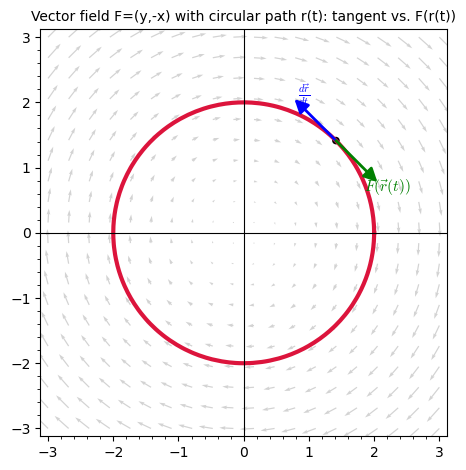

In [6]:
# Visualization: vector field F=(y, -x) and circular path r(t) with tangent vs. F(r(t))
var('x y t')
R = 2

p_field = plot_vector_field((y, -x), (x, -3, 3), (y, -3, 3), color='lightgray')
p_curve = parametric_plot((R*cos(t), R*sin(t)), (t, 0, 2*pi), color='crimson', thickness=3)

t0 = pi/4
p0 = vector([R*cos(t0), R*sin(t0)]).n()
dr_dt0 = vector([-R*sin(t0), R*cos(t0)])
v_tan = (dr_dt0/dr_dt0.norm())*0.9
v_F = vector([p0[1], -p0[0]]); v_F = (v_F/v_F.norm())*0.9

g = (p_field + p_curve
     + point(tuple(p0), size=30, color='black')
     + arrow(tuple(p0), tuple(p0 + v_tan), color='blue', arrowsize=4, thickness=3)
     + arrow(tuple(p0), tuple(p0 + v_F), color='green', arrowsize=4, thickness=3)
     + text(r"$\frac{d\vec{r}}{dt}$", tuple(p0 + v_tan + vector([0.15, 0.05])), color='blue', fontsize=11)
     + text(r"$\vec{F}(\vec{r}(t))$", tuple(p0 + v_F + vector([0.15, -0.05])), color='green', fontsize=11))

show(g, aspect_ratio=1, frame=True,
     title='Vector field F=(y,-x) with circular path r(t): tangent vs. F(r(t))')

---

## **Continuing Your Learning Journey**

You've completed **Vector Fields and Line Integrals**! The concepts you've mastered here form essential building blocks for what comes next.

**Ready for Green's Theorem and Applications?**

In Chapter 5, we'll build upon these foundations to explore even more fascinating aspects of the subject. The knowledge you've gained here will directly apply to the advanced concepts ahead.

### **What's Next**

Chapter 5 will expand your understanding by introducing new techniques and applications that leverage everything you've learned so far.

**[Continue to Chapter 5: Green's Theorem and Applications →](https://cocalc.com/share/public_paths/c0512d5bd98bf5704cda543e069f2c37fbc3a70f)**

*or*

**[Return to Complete Course](https://cocalc.com/share/public_paths/ab3ad2f15d8989653377cbfdc238a82399b2633f)**